In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('customer churn.csv')
df.head()






,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
df["TotalCharges"]=df["TotalCharges"].replace(" ","0")
df["TotalCharges"]=df["TotalCharges"].astype(float)


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [14]:
df.isnull().sum().sum()

0

In [15]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [18]:
df["customerID"].duplicated().sum()

0

In [21]:
def conv(value):
  if value == 1:
    return "yes"
  else:
    return "no"
df['SeniorCitizen']=df["SeniorCitizen"].apply(conv)


In [22]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


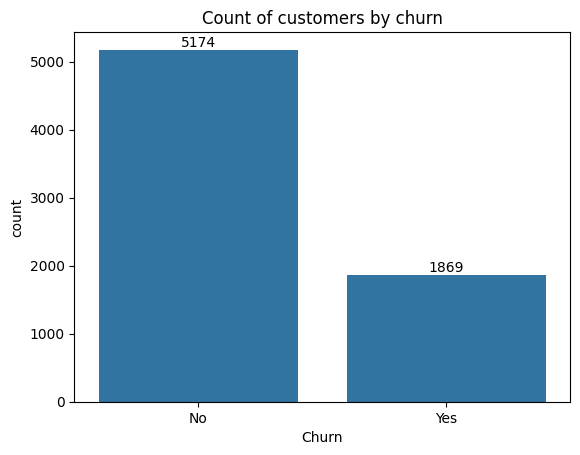

In [31]:
 ax = sns.countplot(x ='Churn', data = df)

 ax.bar_label(ax.containers[0])
 plt.title("Count of customers by churn")
plt.show()

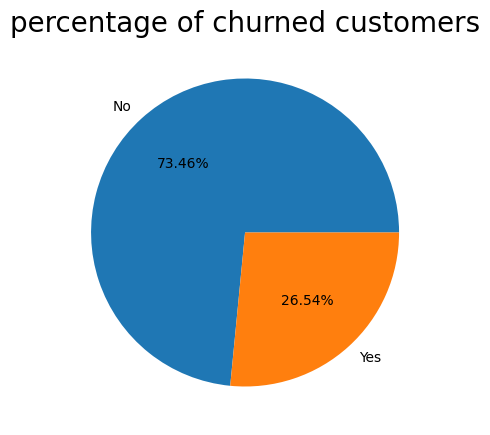

In [33]:
plt.figure(figsize=(10,5))
gb = df.groupby("Churn").agg({'Churn':"count"})
plt.pie(gb['Churn'], labels = gb.index, autopct="%1.2f%%")
plt.title("percentage of churned customers",fontsize = 20)
plt.show()

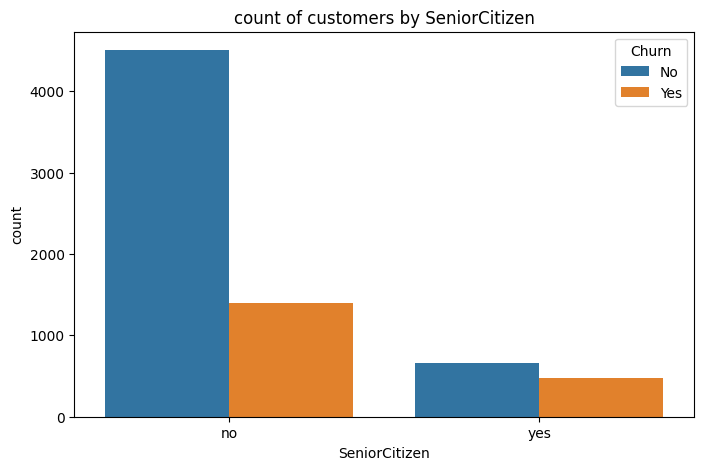

In [40]:
plt.figure(figsize=(8,5))
sns.countplot(x = "SeniorCitizen", data = df,hue = "Churn")
plt.title("count of customers by SeniorCitizen")
plt.show()

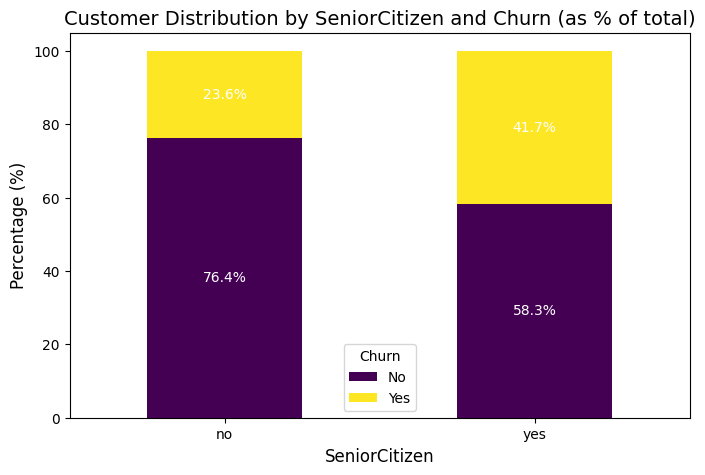

In [41]:
counts = df.groupby(["SeniorCitizen", "Churn"]).size().unstack(fill_value=0)

# Calculate percentages
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

# Plot
fig, ax = plt.subplots(figsize=(8, 5))

# Stacked bar chart
percentages.plot(kind='bar', stacked=True, ax=ax, colormap='viridis')

# Add percentage labels on the bars
for i, bar_group in enumerate(ax.containers):
    for bar in bar_group:
        width = bar.get_width()
        height = bar.get_height()
        x, y = bar.get_xy()
        percentage = f'{height:.1f}%'
        if height > 0:  # To avoid adding labels to zero-height bars
            ax.text(x + width / 2, y + height / 2, percentage, ha='center', va='center', fontsize=10, color='white')

# Titles and labels
ax.set_title("Customer Distribution by SeniorCitizen and Churn (as % of total)", fontsize=14)
ax.set_xlabel("SeniorCitizen", fontsize=12)
ax.set_ylabel("Percentage (%)", fontsize=12)
ax.legend(title="Churn")
plt.xticks(rotation=0)

plt.show()

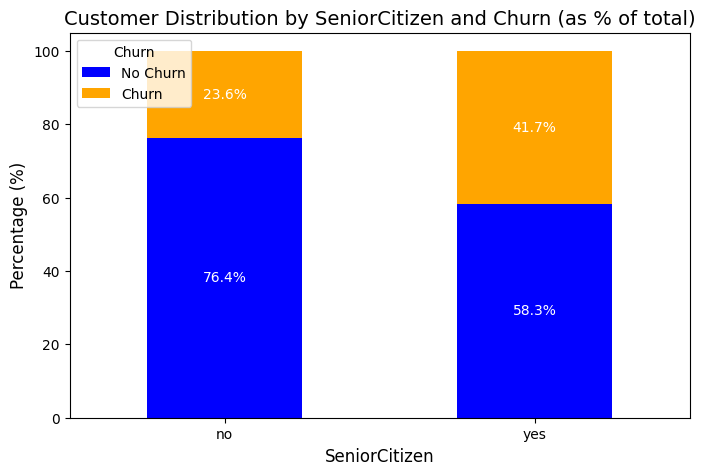

In [42]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your DataFrame

# Calculate the counts
counts = df.groupby(["SeniorCitizen", "Churn"]).size().unstack(fill_value=0)

# Calculate percentages
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

# Define custom colors for the bars
colors = ['blue', 'orange']

# Plot
fig, ax = plt.subplots(figsize=(8, 5))

# Stacked bar chart
percentages.plot(kind='bar', stacked=True, ax=ax, color=colors)

# Add percentage labels on the bars
for i, bar_group in enumerate(ax.containers):
    for bar in bar_group:
        width = bar.get_width()
        height = bar.get_height()
        x, y = bar.get_xy()
        percentage = f'{height:.1f}%'
        if height > 0:  # To avoid adding labels to zero-height bars
            ax.text(x + width / 2, y + height / 2, percentage, ha='center', va='center', fontsize=10, color='white')

# Titles and labels
ax.set_title("Customer Distribution by SeniorCitizen and Churn (as % of total)", fontsize=14)
ax.set_xlabel("SeniorCitizen", fontsize=12)
ax.set_ylabel("Percentage (%)", fontsize=12)
ax.legend(title="Churn", labels=['No Churn', 'Churn'], loc='upper left')
plt.xticks(rotation=0)

plt.show()


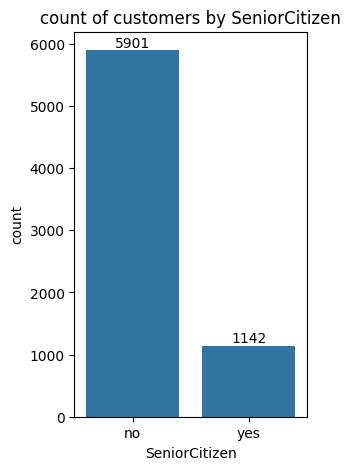

In [44]:
plt.figure(figsize=(3,5))
ax = sns.countplot(x = "SeniorCitizen", data = df)
ax.bar_label(ax.containers[0])
plt.title("count of customers by SeniorCitizen")
plt.show()

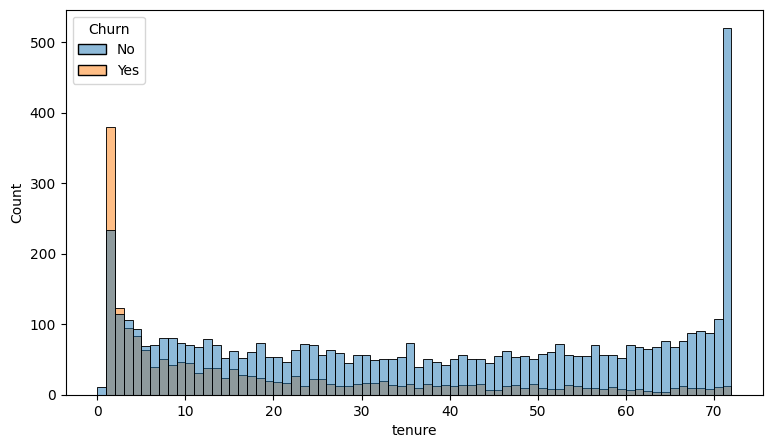

In [51]:
plt.figure(figsize=(9,5))
sns.histplot(x = "tenure", data = df, bins = 72, hue = "Churn")
plt.show()

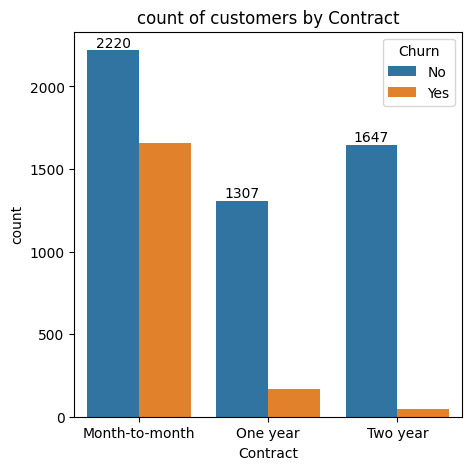

In [57]:
plt.figure(figsize=(5,5))
ax = sns.countplot(x = "Contract", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("count of customers by Contract")
plt.show()

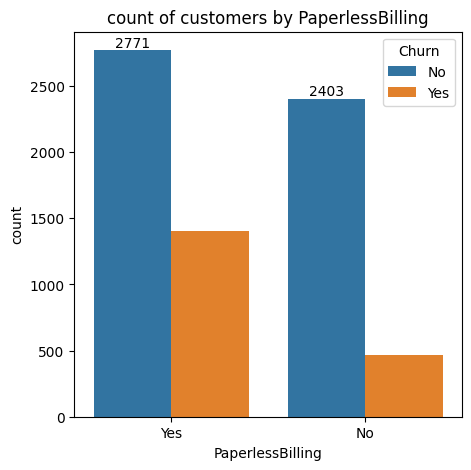

In [58]:
plt.figure(figsize=(5,5))
ax = sns.countplot(x = "PaperlessBilling", data = df,hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("count of customers by PaperlessBilling")
plt.show()

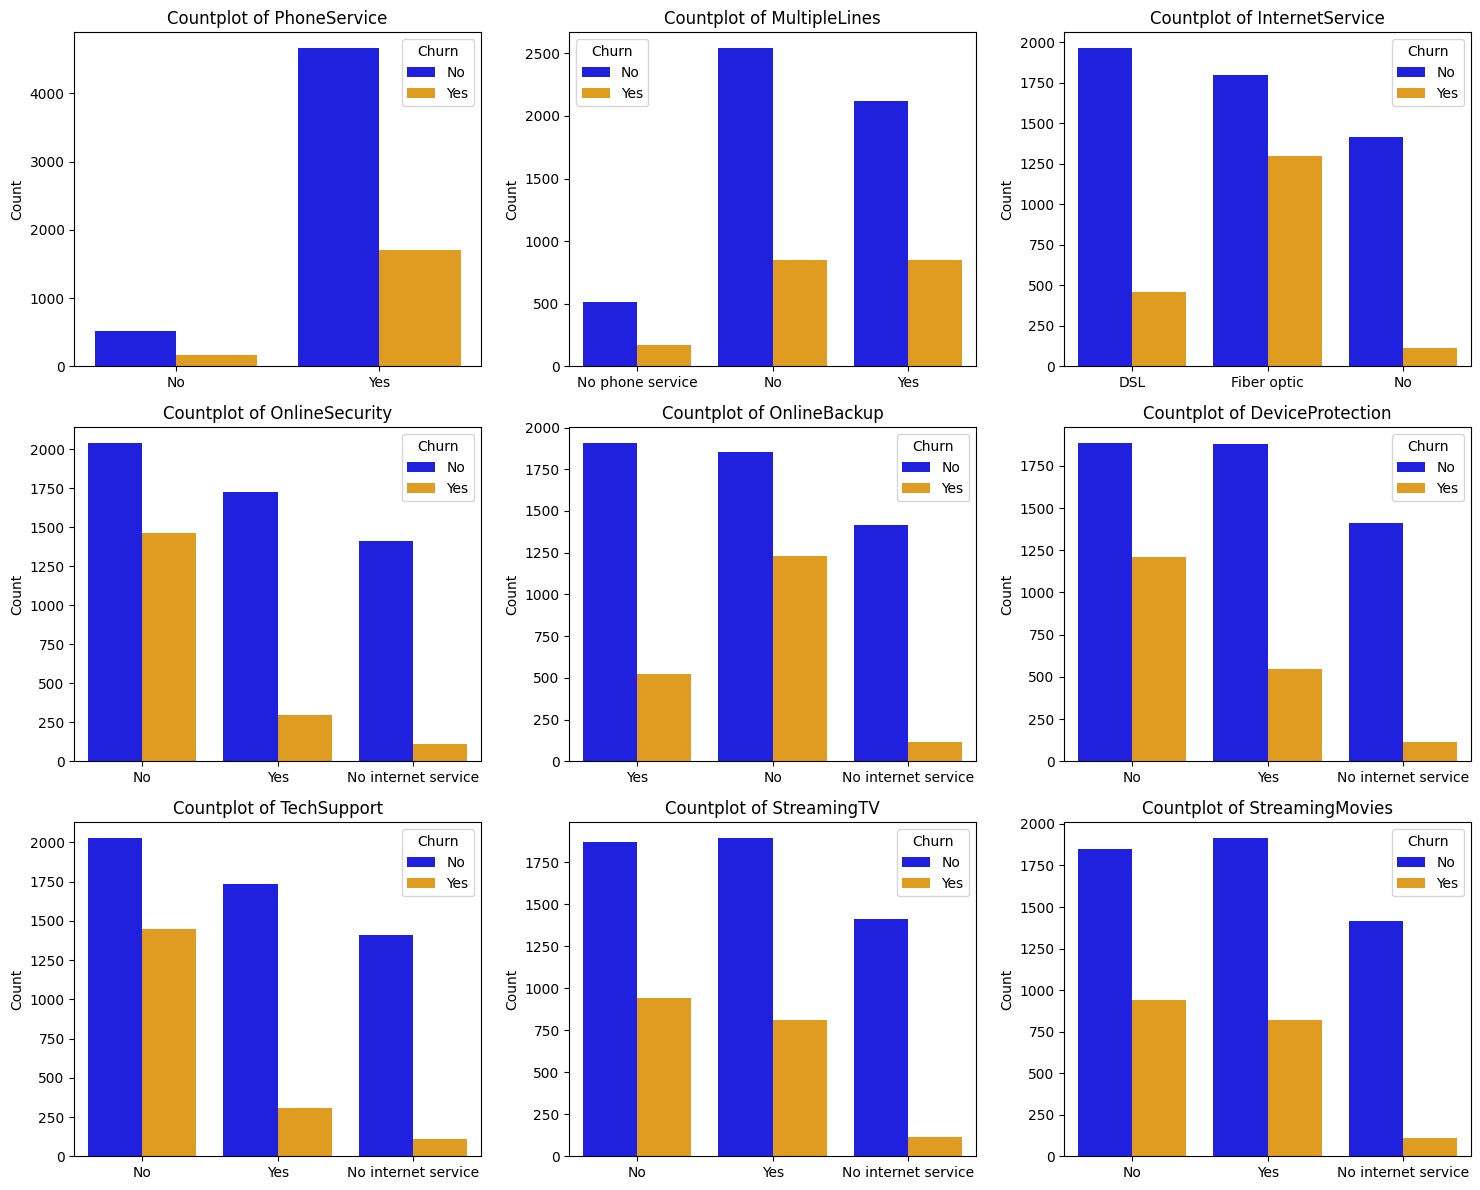

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns
columns = ['PhoneService', 'MultipleLines', 'InternetService',
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
           'TechSupport', 'StreamingTV', 'StreamingMovies']

# Determine the grid size for subplots
num_cols = len(columns)
rows = (num_cols + 2) // 3  # 3 columns per row

# Create the figure and axes for subplots
fig, axes = plt.subplots(rows, 3, figsize=(15, rows * 4))
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Create countplots for each column
for i, column in enumerate(columns):
    sns.countplot(data=df, x=column, hue='Churn', palette=['blue', 'orange'], ax=axes[i])
    axes[i].set_title(f"Countplot of {column}", fontsize=12)
    axes[i].set_xlabel("")  # Remove x-axis label for cleaner look
    axes[i].set_ylabel("Count")

# Remove extra subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


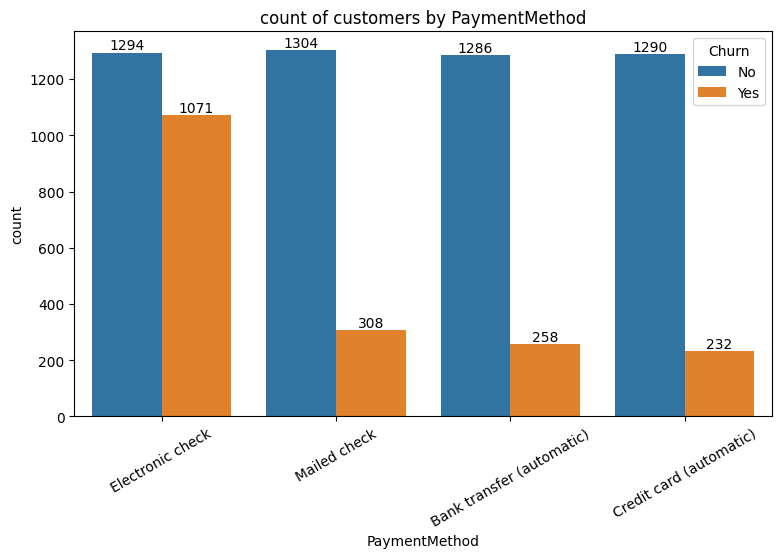

In [65]:
plt.figure(figsize=(9,5))
ax = sns.countplot(x = "PaymentMethod", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("count of customers by PaymentMethod")
plt.xticks(rotation = 30)
plt.show()

In [60]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)